# Q1

In [1]:
import numpy as np
import time
from numba import njit

# Define states
states = ["Bull", "Bear", "Recession"]

# Transition matrix
transition_matrix = np.array([
    [0.9, 0.075, 0.025],  # Bull -> (Bull, Bear, Recession)
    [0.15, 0.8, 0.05],    # Bear -> (Bull, Bear, Recession)
    [0.25, 0.25, 0.5]     # Recession -> (Bull, Bear, Recession)
])

# Pure Python version
def simulate_markov_pure(iterations):
    state_counts = {state: 0 for state in states}
    current_state = np.random.choice(states)
    
    for _ in range(iterations):
        state_counts[current_state] += 1
        current_index = states.index(current_state)
        current_state = np.random.choice(states, p=transition_matrix[current_index])
    
    return {state: count / iterations for state, count in state_counts.items()}


# Run simulations
iterations = 10**6

start_time = time.time()
pure_results = simulate_markov_pure(iterations)
pure_time = time.time() - start_time


# Print results
print("Pure Python Results:", pure_results, "Time Taken:", pure_time, "seconds")


Pure Python Results: {'Bull': 0.62687, 'Bear': 0.310828, 'Recession': 0.062302} Time Taken: 28.766177892684937 seconds


In [2]:
import cProfile
import pstats

cProfile.run('simulate_markov_pure(10**5)', 'profile_results')

# Analyze and print top 10 slowest functions
stats = pstats.Stats('profile_results')
stats.sort_stats('cumulative').print_stats(10)


Mon Nov  3 12:32:21 2025    profile_results

         1100014 function calls in 3.465 seconds

   Ordered by: cumulative time
   List reduced from 19 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    3.465    3.465 {built-in method builtins.exec}
        1    0.000    0.000    3.465    3.465 <string>:1(<module>)
        1    2.988    2.988    3.465    3.465 /tmp/ipykernel_19413/2631369578.py:16(simulate_markov_pure)
   100000    0.127    0.000    0.315    0.000 /home/giulio/.local/lib/python3.10/site-packages/numpy/_core/numerictypes.py:471(issubdtype)
   200000    0.123    0.000    0.179    0.000 /home/giulio/.local/lib/python3.10/site-packages/numpy/_core/numerictypes.py:289(issubclass_)
   200000    0.106    0.000    0.135    0.000 /home/giulio/.local/lib/python3.10/site-packages/numpy/_core/getlimits.py:490(__new__)
   300000    0.065    0.000    0.065    0.000 {built-in method builtins.issubclass}


In [3]:
import numpy as np

# Define states and transition matrix
states = ["Bull", "Bear", "Recession"]
transition_matrix = np.array([
    [0.9, 0.075, 0.025],  # Bull -> (Bull, Bear, Recession)
    [0.15, 0.8, 0.05],    # Bear -> (Bull, Bear, Recession)
    [0.25, 0.25, 0.5]     # Recession -> (Bull, Bear, Recession)
])

def simulate_markov_numpy(iterations):
    state_counts = np.zeros(3, dtype=int)
    current_state = np.random.randint(0, 3)  # Use integer indices for states

    # Precompute cumulative probabilities for fast sampling
    cumulative_probs = np.cumsum(transition_matrix, axis=1)

    for _ in range(iterations):
        state_counts[current_state] += 1
        rand_val = np.random.rand()
        current_state = np.searchsorted(cumulative_probs[current_state], rand_val)

    return dict(zip(states, state_counts / iterations))

# Run and measure performance
import time

iterations = 10**6

start_time = time.time()
numpy_results = simulate_markov_numpy(iterations)
numpy_time = time.time() - start_time

print("NumPy Optimized Results:", numpy_results, "Time Taken:", numpy_time, "seconds")


NumPy Optimized Results: {'Bull': np.float64(0.624483), 'Bear': np.float64(0.313302), 'Recession': np.float64(0.062215)} Time Taken: 4.391151189804077 seconds


# Q3

In [10]:
from functools import wraps
import matplotlib.pyplot as plt


def myplot(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        plt.style.use('seaborn-v0_8-paper')
        plt.rcParams.update({
            'font.size': 12,
            'axes.titlesize': 14,
            'axes.labelsize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'figure.dpi': 150
        })

        fig, ax = plt.subplots(figsize=(6, 4))
        func(ax, *args, **kwargs)
        fig.tight_layout()
        fig.savefig(f"{func.__name__}.pdf")
        plt.show()
    return wrapper


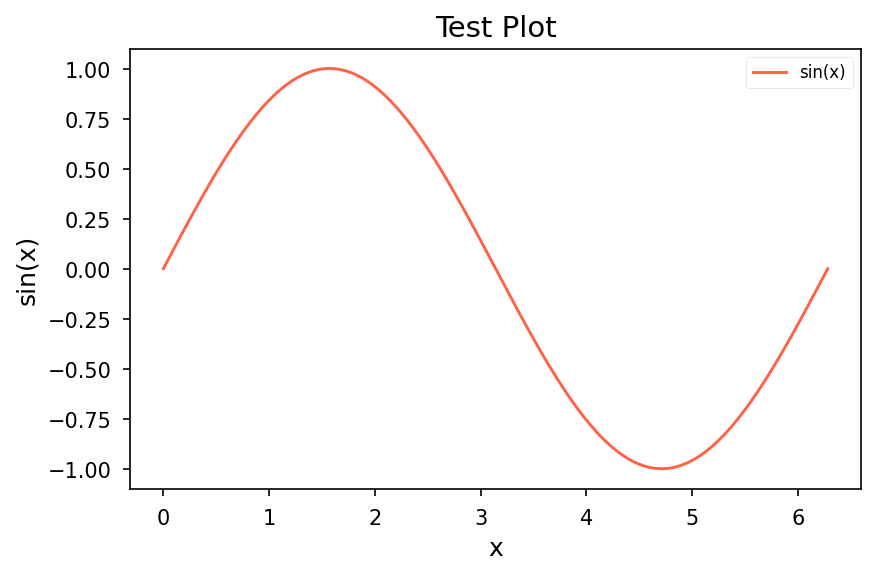

In [11]:
@myplot
def my_cool_plot(ax):
    import numpy as np
    x = np.linspace(0, 2*np.pi, 200)
    y = np.sin(x)
    ax.plot(x, y, label='sin(x)', color='tomato')
    ax.set_title("Test Plot")
    ax.set_xlabel("x")
    ax.set_ylabel("sin(x)")
    ax.legend()

# Run it!
my_cool_plot()
